### Contents
1. Accepted Paper List with arXiv Link
2. Keywords
3. Word Cloud
4. Output (README)

In [1]:
CONFERENCE = "EMNLP 2020"

# 1. Accepted Paper List with arXiv Link

## Read Paper List

In [2]:
import csv

with open("data/papers.csv") as csvfile:
    f = csv.reader(csvfile)
    paper_list = [line for line in f]

In [3]:
paper_list[:3]

[['submissionID',
  'title',
  'authors',
  'track',
  'acceptanceStatus',
  'abstract',
  'submissionType'],
 ['14',
  'Fully Quantized Transformer for Machine Translation',
  'Gabriele Prato, Ella Charlaix and Mehdi Rezagholizadeh',
  'Machine Translation and Multilinguality',
  'Accept-Findings',
  'State-of-the-art neural machine translation methods employ massive amounts of parameters. Drastically reducing computational costs of such methods without affecting performance has been up to this point unsuccessful. To this end, we propose FullyQT: an all-inclusive quantization strategy for the Transformer. To the best of our knowledge, we are the first to show that it is possible to avoid any loss in translation quality with a fully quantized Transformer. Indeed, compared to full-precision, our 8-bit models score greater or equal BLEU on most tasks. Comparing ourselves to all previously proposed methods, we achieve state-of-the-art quantization results.',
  'Long Paper'],
 ['44',
  'Su

In [4]:
len(paper_list)

1200

In [5]:
papers = {"main_long": [], "main_short": [], "findings_long": [], "findings_short": []}
tracks = set()

for p in paper_list[1:]:
    if p[3].endswith(":Best Paper Candidates"):
        p[3] = p[3][:-len(":Best Paper Candidates")]
    if p[3].endswith(":Ethics"):
        p[3] = p[3][:-len(":Ethics")]
    tracks.add(p[3])
        
    if p[4] == "Accept" and p[6] == "Long Paper":
        papers["main_long"].append(p[1:4])
    elif p[4] == "Accept" and p[6] == "Short Paper":
        papers["main_short"].append(p[1:4])
    elif p[4] == "Accept-Findings" and p[6] == "Long Paper":
        papers["findings_long"].append(p[1:4])
    elif p[4] == "Accept-Findings" and p[6] == "Short Paper":
        papers["findings_short"].append(p[1:4])
    else:
        raise ValueError(f"the paper has wrong type, {p}")

In [6]:
for k, v in papers.items():
    print(f"{k}: {len(v)}")

main_long: 602
main_short: 150
findings_long: 332
findings_short: 115


In [7]:
papers["main_long"][:3]

[['Meta Fine-Tuning Neural Language Models for Multi-Domain Text Mining',
  'Chengyu Wang, Minghui Qiu, jun huang and XIAOFENG HE',
  'Information Retrieval and Text Mining'],
 ['Short Text Topic Modeling with Topic Distribution Quantization and Negative Sampling Decoder',
  'Xiaobao Wu, Chunping Li, Yan Zhu and Yishu Miao',
  'Information Retrieval and Text Mining'],
 ['Unsupervised Commonsense Question Answering with Self-Talk',
  'Vered Shwartz, Peter West, Ronan Le Bras, Chandra Bhagavatula and Yejin Choi',
  'Semantics: Sentence-level Semantics, Textual Inference and Other areas']]

In [8]:
tracks

{'Computational Social Science and Social Media',
 'Dialog and Interactive Systems',
 'Discourse and Pragmatics',
 'Information Extraction',
 'Information Retrieval and Text Mining',
 'Interpretability and Analysis of Models for NLP',
 'Language Generation',
 'Language Grounding to Vision, Robotics and Beyond',
 'Linguistic Theories, Cognitive Modeling and Psycholinguistics',
 'Machine Learning for NLP',
 'Machine Translation and Multilinguality',
 'Multidisciplinary and AC COI',
 'NLP Applications',
 'Phonology, Morphology and Word Segmentation',
 'Question Answering',
 'Semantics: Lexical Semantics',
 'Semantics: Sentence-level Semantics, Textual Inference and Other areas',
 'Sentiment Analysis, Stylistic Analysis, and Argument Mining',
 'Speech and Multimodality',
 'Summarization',
 'Syntax: Tagging, Chunking, and Parsing'}

## Search arXiv Link

In [9]:
from googlesearch import search
import urllib
from bs4 import BeautifulSoup
from difflib import SequenceMatcher
from tqdm import tqdm
import time


def similarity(a, b):
    return SequenceMatcher(None, a, b).ratio()


def search_arxiv_link(title):
    link = None
    for j in search(title, tld="co.in", num=10, stop=1, pause=1.0, user_agent=CONFERENCE):
        if 'arxiv.org/abs' in j:
            thepage = urllib.request.urlopen(j)
            soup = BeautifulSoup(thepage, "html.parser")
            searched_title = ' '.join(soup.title.text.lower().split()[1:])
            if similarity(title, searched_title) > 0.8:
                link = j
                break
            else:
                print(f"NOT MATCHED: {title} -- {searched_title}")
    return link

## Generate Paper List (Markdown Text) with arXiv Link

In [10]:
def attach_arxiv_link(papers):
    for p in tqdm(papers):
        title, authors, track = p
        link = search_arxiv_link(title.lower())
        if link:
            p.append(link)
        else:
            p.append("")

In [11]:
attach_arxiv_link(papers["main_long"])

  7%|▋         | 45/602 [02:36<33:18,  3.59s/it]

NOT MATCHED: dusql: a large-scale and pragmatic chinese text-to-sql dataset -- tableqa: a large-scale chinese text-to-sql dataset for table-aware sql generation


  9%|▊         | 52/602 [02:59<31:19,  3.42s/it]

NOT MATCHED: relation-aware graph attention networks with relational position encodings for emotion recognition in conversations -- relation-aware graph attention network for visual question answering


  9%|▉         | 54/602 [03:05<29:43,  3.25s/it]

NOT MATCHED: scene restoring for narrative machine reading comprehension -- improving machine reading comprehension with contextualized commonsense knowledge


  9%|▉         | 56/602 [03:11<29:33,  3.25s/it]

NOT MATCHED: learn to cross-lingual transfer with meta graph learning across heterogeneous languages -- zero-shot cross-lingual transfer with meta learning


 10%|█         | 62/602 [03:36<35:45,  3.97s/it]

NOT MATCHED: towards more accurate uncertainty estimation in text classification -- multi-loss sub-ensembles for accurate classification with uncertainty estimation


 12%|█▏        | 70/602 [04:03<31:35,  3.56s/it]

NOT MATCHED: active learning for bert: an empirical study -- explainable active learning (xal): an empirical study of how local explanations impact annotator experience


 17%|█▋        | 100/602 [05:50<31:00,  3.71s/it]

NOT MATCHED: coarse-to-fine query focused multi-document summarization -- query focused multi-document summarization with distant supervision


 17%|█▋        | 102/602 [05:57<30:19,  3.64s/it]

NOT MATCHED: towards enhancing faithfulness for neural machine translation -- modeling fluency and faithfulness for diverse neural machine translation


 26%|██▌       | 156/602 [09:07<29:01,  3.90s/it]

NOT MATCHED: a knowledge-aware sequence-to-tree network for math word problem solving -- graph-to-tree neural networks for learning structured input-output translation with applications to semantic parsing and math word problem


 32%|███▏      | 195/602 [11:30<25:13,  3.72s/it]

NOT MATCHED: uncertainty-aware label reﬁnement for sequence labeling -- uncertainty-aware self-training for text classification with few labels


 35%|███▌      | 211/602 [12:25<26:44,  4.10s/it]

NOT MATCHED: sequential modelling of the evolution of word representations for semantic change detection -- autoencoding word representations through time for semantic change detection


 35%|███▌      | 212/602 [12:29<26:47,  4.12s/it]

NOT MATCHED: debiasing knowledge graph embeddings -- adversarial learning for debiasing knowledge graph embeddings


 46%|████▌     | 278/602 [16:31<18:23,  3.41s/it]

NOT MATCHED: hit: nested named entity recognition via head-tail pair and token interaction -- nested named entity recognition via second-best sequence learning and decoding


 54%|█████▍    | 328/602 [19:22<14:54,  3.26s/it]

NOT MATCHED: ted-cdb: a large-scale chinese discourse relation dataset on ted talks -- shallow discourse annotation for chinese ted talks


 61%|██████▏   | 369/602 [21:40<14:54,  3.84s/it]

NOT MATCHED: capwap: image captioning with a purpose -- fine-grained image captioning with global-local discriminative objective


 62%|██████▏   | 373/602 [21:55<13:57,  3.66s/it]

NOT MATCHED: improving grammatical error correction models with purpose-built adversarial examples -- improving grammatical error correction via pre-training a copy-augmented architecture with unlabeled data


 67%|██████▋   | 402/602 [23:49<12:54,  3.87s/it]

NOT MATCHED: weakly supervised subevent knowledge acquisition -- a weakly supervised approach to train temporal relation classifiers and acquire regular event pairs simultaneously


 70%|██████▉   | 419/602 [24:50<10:56,  3.59s/it]

NOT MATCHED: template guided text generation for task-oriented dialogue -- diversifying task-oriented dialogue response generation with prototype guided paraphrasing


 74%|███████▍  | 446/602 [26:26<09:37,  3.70s/it]

NOT MATCHED: autoprompt: eliciting knowledge from language models with automatically generated prompts -- how can we know what language models know?


 74%|███████▍  | 448/602 [26:32<08:46,  3.42s/it]

NOT MATCHED: routing enforced generative model for recipe generation -- recipegpt: generative pre-training based cooking recipe generation and evaluation system


 78%|███████▊  | 470/602 [28:04<09:43,  4.42s/it]

NOT MATCHED: a spectral method for unsupervised multi-document summarization -- summpip: unsupervised multi-document summarization with sentence graph compression


 78%|███████▊  | 472/602 [28:15<10:57,  5.06s/it]

NOT MATCHED: controllable meaning representation to text generation: linearization and data augmentation strategies -- controlled text generation for data augmentation in intelligent artificial agents


 79%|███████▉  | 477/602 [28:37<09:56,  4.77s/it]

NOT MATCHED: feded: federated learning via ensemble distillation for medical relation extraction -- ensemble distillation for robust model fusion in federated learning


 82%|████████▏ | 492/602 [29:42<09:00,  4.92s/it]

NOT MATCHED: unsupervised stance detection for arguments from consequences -- unsupervised user stance detection on twitter


 85%|████████▌ | 514/602 [31:12<05:47,  3.94s/it]

NOT MATCHED: friendly topic assistant for transformer based abstractive summarization -- on extractive and abstractive neural document summarization with transformer language models


 89%|████████▉ | 535/602 [32:34<03:48,  3.41s/it]

NOT MATCHED: unsupervised parsing with s-diora: single tree encoding for deep inside-outside recursive autoencoders -- unsupervised latent tree induction with deep inside-outside recursive autoencoders


 90%|█████████ | 544/602 [33:18<06:29,  6.71s/it]

NOT MATCHED: charm: inferring personal attributes from conversations -- listening between the lines: learning personal attributes from conversations


 92%|█████████▏| 553/602 [33:49<02:57,  3.63s/it]

NOT MATCHED: better highlighting: creating sub-sentence summary highlights -- towards annotating and creating sub-sentence summary highlights


 93%|█████████▎| 562/602 [34:21<02:22,  3.56s/it]

NOT MATCHED: neural extractive summarization with hierarchical attentive heterogeneous graph network -- heterogeneous graph neural networks for extractive document summarization


 95%|█████████▌| 572/602 [34:52<01:34,  3.16s/it]

NOT MATCHED: form2seq : a framework for higher-order form structure extraction -- document structure extraction using prior based high resolution hierarchical semantic segmentation


 96%|█████████▌| 576/602 [35:06<01:29,  3.45s/it]

NOT MATCHED: emotag1200 👍: understanding the association between emojis 😄 and emotions 😻 -- are emojis emotional? a study to understand the association between emojis and emotions


 98%|█████████▊| 590/602 [35:51<00:38,  3.21s/it]

NOT MATCHED: end-to-end emotion-cause pair extraction based on sliding window multi-label learning -- end-to-end emotion-cause pair extraction via learning to link


100%|█████████▉| 599/602 [36:22<00:09,  3.30s/it]

NOT MATCHED: rethinkcws: is chinese word segmentation a solved task? -- bert meets chinese word segmentation


100%|██████████| 602/602 [36:32<00:00,  3.27s/it]


In [12]:
attach_arxiv_link(papers["main_short"])

 11%|█         | 16/150 [00:54<07:29,  3.35s/it]

NOT MATCHED: the thieves on sesame street are polyglots - extracting multilingual models from monolingual apis -- thieves on sesame street! model extraction of bert-based apis


 21%|██▏       | 32/150 [01:59<09:59,  5.08s/it]

NOT MATCHED: modularized syntactic neural networks for sentence classification -- convolutional neural networks for sentence classification


 25%|██▍       | 37/150 [02:19<07:33,  4.01s/it]

NOT MATCHED: learning to contrast the counterfactual samples for robust visual question answering -- counterfactual samples synthesizing for robust visual question answering


 34%|███▍      | 51/150 [03:09<05:58,  3.62s/it]

NOT MATCHED: towards better context-aware lexical semantics:adjusting contextualized representations through static anchors -- how can bert help lexical semantics tasks?


 39%|███▉      | 59/150 [03:42<06:16,  4.14s/it]

NOT MATCHED: denoising relation extraction from document-level distant supervision -- denoising distant supervision for relation extraction via instance-level adversarial training


 59%|█████▉    | 89/150 [05:26<03:40,  3.62s/it]

NOT MATCHED: an empirical study of pre-trained transformers for arabic information extraction -- gigabert: zero-shot transfer learning from english to arabic


 61%|██████    | 91/150 [05:32<03:26,  3.50s/it]

NOT MATCHED: semi-supervised new event type induction and event detection -- semi-supervised acoustic event detection based on tri-training


 75%|███████▍  | 112/150 [06:46<02:17,  3.61s/it]

NOT MATCHED: a preliminary exploration of gans for keyphrase generation -- keyphrase generation for scientific articles using gans


 88%|████████▊ | 132/150 [07:59<01:08,  3.81s/it]

NOT MATCHED: emotion-cause pair extraction as sequence labeling based on a novel tagging scheme -- emotion-cause pair extraction: a new task to emotion analysis in texts


100%|██████████| 150/150 [08:59<00:00,  2.99s/it]


In [13]:
attach_arxiv_link(papers["findings_long"])

  8%|▊         | 28/332 [01:41<19:39,  3.88s/it]

NOT MATCHED: dual low-rank multimodal fusion -- efficient low-rank multimodal fusion with modality-specific factors


 11%|█         | 35/332 [02:06<18:00,  3.64s/it]

NOT MATCHED: revisiting representation degeneration problem in language modeling -- representation degeneration problem in training natural language generation models


 22%|██▏       | 73/332 [04:19<15:28,  3.59s/it]

NOT MATCHED: gcdst: a graph-based and copy-augmented multi-domain dialogue state tracking -- multi-domain dialogue state tracking as dynamic knowledge graph enhanced question answering


 23%|██▎       | 75/332 [04:27<16:13,  3.79s/it]

NOT MATCHED: semi-supervised learning for video captioning -- image captioning with very scarce supervised data: adversarial semi-supervised learning approach


 28%|██▊       | 93/332 [05:38<16:55,  4.25s/it]

NOT MATCHED: improving knowledge-aware dialogue response generation by using human-written prototype dialogues -- improving knowledge-aware dialogue generation via knowledge base question answering


 40%|████      | 134/332 [08:09<13:09,  3.99s/it]

NOT MATCHED: ruler: data programming by demonstration for document labeling -- data programming by demonstration: a framework for interactively learning labeling functions


 42%|████▏     | 138/332 [08:24<11:51,  3.67s/it]

NOT MATCHED: multi-pretraining for large-scale text classification -- taming pretrained transformers for extreme multi-label text classification


 46%|████▌     | 153/332 [09:14<09:54,  3.32s/it]

NOT MATCHED: rethinking topic modelling: from document-space to term-space -- semantic concept spaces: guided topic model refinement using word-embedding projections


 49%|████▉     | 164/332 [09:55<10:17,  3.67s/it]

NOT MATCHED: divgan: towards diverse paraphrase generation via diversified generative adversarial network -- towards diverse paraphrase generation using multi-class wasserstein gan


 51%|█████     | 168/332 [10:10<10:06,  3.70s/it]

NOT MATCHED: improving compositional generalization in semantic parsing -- compositional generalization in semantic parsing: pre-training vs. specialized architectures


 57%|█████▋    | 189/332 [11:21<07:47,  3.27s/it]

NOT MATCHED: pharmmt: a neural machine translation approach to simplify prescription directions -- neural machine translation from simplified translations


 66%|██████▋   | 220/332 [13:13<07:11,  3.86s/it]

NOT MATCHED: regularization of distinct strategies for unsupervised question generation -- contrastive multi-document question generation


 73%|███████▎  | 241/332 [14:26<05:13,  3.45s/it]

NOT MATCHED: accurate polyglot semantic parsing with dag grammars -- semantic graph parsing with recurrent neural network dag grammars


 86%|████████▌ | 285/332 [17:01<02:57,  3.78s/it]

NOT MATCHED: factorized transformer for multi-domain neural machine translation -- multilingual multi-domain adaptation approaches for neural machine translation


 96%|█████████▋| 320/332 [19:15<00:44,  3.74s/it]

NOT MATCHED: tri-train: automatic pre-fine tuning between pre-training and fine-tuning for sciner -- how to pre-train your model? comparison of different pre-training models for biomedical question answering


 98%|█████████▊| 324/332 [19:29<00:28,  3.55s/it]

NOT MATCHED: tensorized embedding layers -- tensorized embedding layers for efficient model compression


100%|██████████| 332/332 [19:54<00:00,  3.00s/it]


In [14]:
attach_arxiv_link(papers["findings_short"])

  3%|▎         | 3/115 [00:10<07:02,  3.77s/it]

NOT MATCHED: a greedy bit-flip training algorithm for binarized knowledge graph embeddings -- binarized knowledge graph embeddings


 23%|██▎       | 26/115 [01:27<05:00,  3.38s/it]

NOT MATCHED: learning to generate clinically coherent chest x-ray reports -- clinically accurate chest x-ray report generation


 43%|████▎     | 49/115 [02:50<04:08,  3.77s/it]

NOT MATCHED: tsdg: content-aware neural response generation with two-stage decoding process -- augmenting neural response generation with context-aware topical attention


 54%|█████▍    | 62/115 [03:35<03:14,  3.68s/it]

NOT MATCHED: cross-lingual training of neural models for document ranking -- cross-lingual information retrieval with bert


 79%|███████▉  | 91/115 [05:15<01:29,  3.75s/it]

NOT MATCHED: towards low-resource semi-supervised dialogue generation with meta-learning -- meta-learning for low-resource natural language generation in task-oriented dialogue systems


100%|██████████| 115/115 [06:36<00:00,  3.57s/it]

NOT MATCHED: enhancing generalization in natural language inference by syntax -- improving generalization by incorporating coverage in natural language inference


# 2. Keywords

In [15]:
titles = [p[0] for _, paper in papers.items() for p in paper]

In [16]:
titles[:3]

['Meta Fine-Tuning Neural Language Models for Multi-Domain Text Mining',
 'Short Text Topic Modeling with Topic Distribution Quantization and Negative Sampling Decoder',
 'Unsupervised Commonsense Question Answering with Self-Talk']

In [17]:
from collections import Counter
import re

counter = Counter()
for title in titles:
    title = (
        title.lower()
        .replace(" multi-", "multi")
        .replace(" cross-", "cross")
        .replace(" representation ", " representations ")
    )
    splitted = title.split()
    counter.update(splitted)

In [18]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords_deep_learning = [
    "",
    "deep",
    "learning",
    "neural",
    "network",
    "networks",
    "via",
    "using",
    "based",
    "towards",
    "text",
    "natural",
    "language",
    "model",
    "models",
    "approach",
    "improving",
]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joohong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
keywords = []
for w in counter.most_common():
    if w[0] not in stopwords.words('english') and w[0] not in stopwords_deep_learning:
        keywords.append(w)

In [20]:
keywords[:10]

[('generation', 105),
 ('knowledge', 76),
 ('translation', 70),
 ('machine', 66),
 ('dialogue', 60),
 ('semantic', 58),
 ('graph', 57),
 ('extraction', 50),
 ('word', 49),
 ('data', 49)]

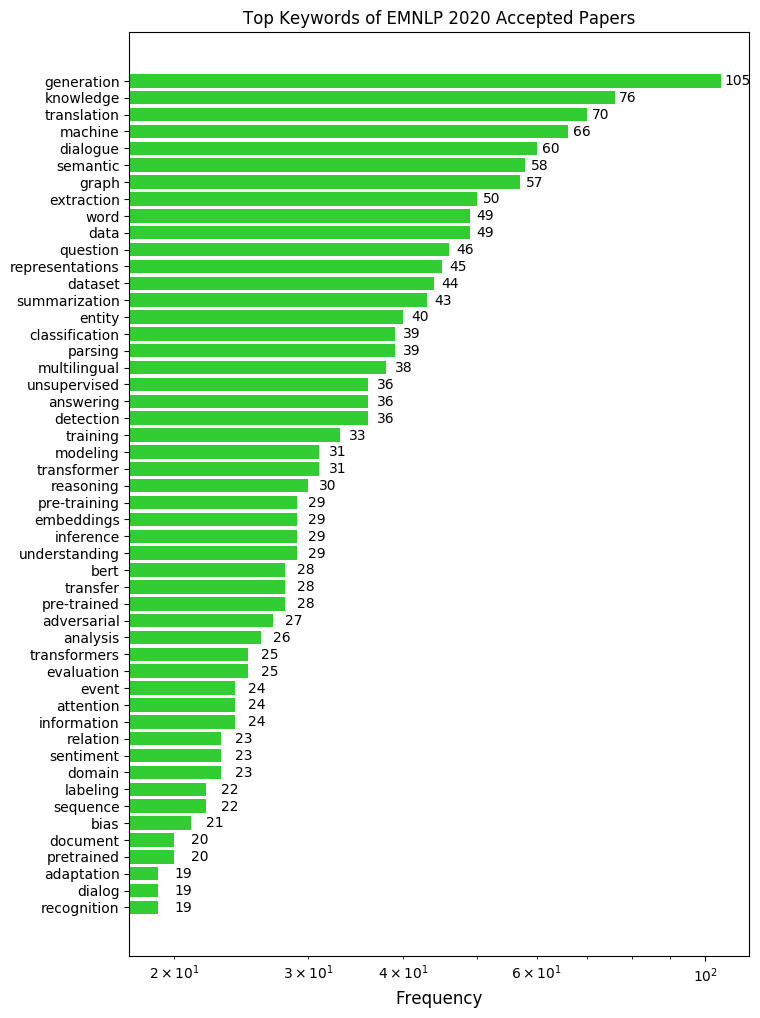

In [31]:
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline


plt.rcdefaults()
fig, ax = plt.subplots(figsize=(8, 12))

top_k = 50
key = [k[0] for k in keywords[:top_k]] 
value = [k[1] for k in keywords[:top_k]] 
y_pos = list(range(len(key)))

ax.barh(y_pos, value, align="center", color=random.sample(mcolors.cnames.items(), 1)[0], ecolor='black', log=True)
ax.set_yticks(y_pos)
ax.set_yticklabels(key, rotation=0, fontsize=10)
ax.invert_yaxis() 

for i, v in enumerate(value):
    ax.text(v + 1, i + .25, str(v), color='black', fontsize=10)
ax.set_xlabel("Frequency", fontsize=12)
ax.set_title(f"Top Keywords of {CONFERENCE} Accepted Papers", fontsize=12)

plt.savefig("figure/keywords.png", bbox_inches="tight")
plt.show()

# 3. Word Cloud

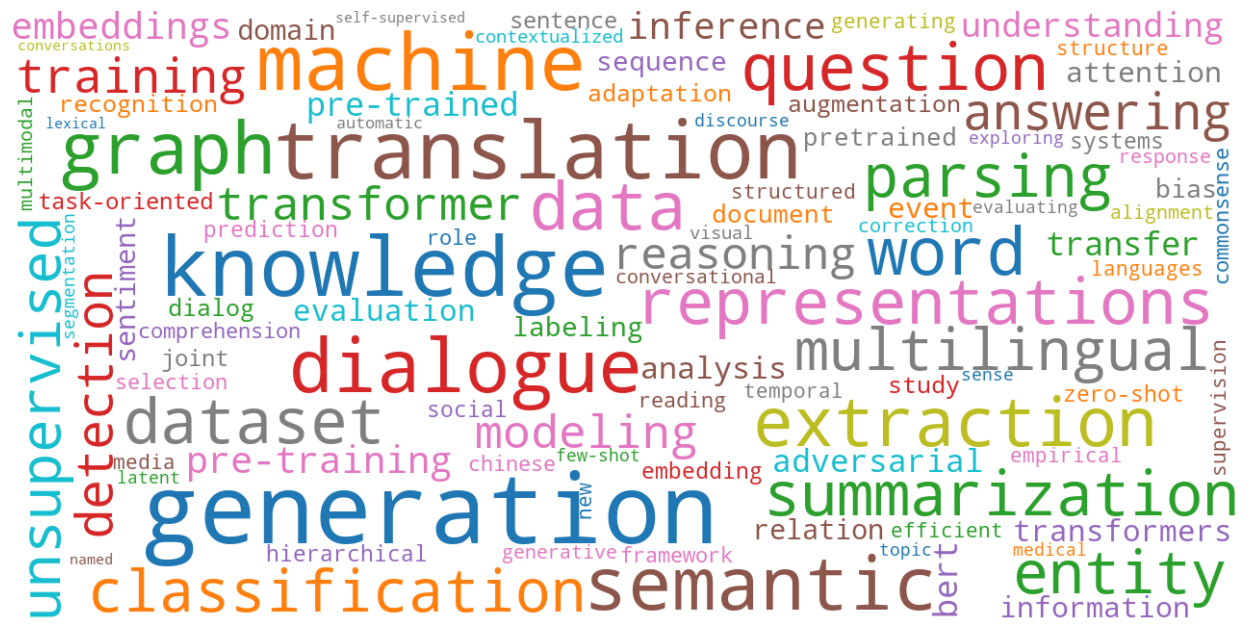

In [32]:
# Show the word cloud forming by keywords
from wordcloud import WordCloud
from matplotlib import cm

cmap = random.sample(list(cm.datad.keys()), 1)[0]
wordcloud = WordCloud(max_font_size=100, 
                      max_words=100, 
                      width=1280, 
                      height=640,
                      colormap="tab10",
                      background_color="white").generate_from_frequencies(dict(keywords))
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.savefig("figure/wordcloud.png", bbox_inches="tight")
plt.show()

# 4. Output (README)

In [39]:
def print_papers(papers, tag):
    for p in papers:
        if p[-1]:
            f.write(f"- `[{tag}]` **{p[0]}**, *{p[1]}*, <{p[-1]}>\n")
        else:
            f.write(f"- `[{tag}]` **{p[0]}**, *{p[1]}*\n")

In [40]:
with open("README.md", "w") as f:
    f.write(f"# {CONFERENCE} Papers\n\n")
    f.write("![wordcloud](figure/wordcloud.png)\n\n")
    
    f.write("## Keywords\n\n")
    f.write("![keywords](figure/keywords.png)\n\n")
    
    f.write("## Accepted Papers\n\n")
    f.write(f"There are accepted papers of {CONFERENCE} with arXiv link. "
            "Papers are grouped according to their track. "
            "The tags `[M-L]`, `[M-S]`, `[F-L]`, and `[F-S]` (prefix of each paper) represent "
            "Main Conference -- Long Paper, Main Conference -- Short Paper, "
            "Findings -- Long Paper, and Findings -- Short Paper, respectively.\n\n")
    
    # ToC
    f.write("**Table of Contents**\n\n")
    for track in tracks:
        track_tag = '-'.join(track.lower().replace(':', '').replace(',', '').split())
        f.write(f"- [{track}](#{track_tag})\n")
    f.write("\n")   
    
    for track in tracks:
        f.write(f"### {track}\n\n")
        print_papers(papers["main_long"], tag="M-L")
        print_papers(papers["main_short"], tag="M-S")
        print_papers(papers["findings_long"], tag="F-L")
        print_papers(papers["findings_short"], tag="F-S")
        f.write("\n[Back to Top](#accepted-papers)\n\n")